In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import collections
plt.rcParams['figure.figsize'] = [16, 5]

In [3]:
df = pd.read_csv('twitter.csv')
df = df.replace('None', 'martalempart')
users = ['RozeckaPL', 'GoTracz', 'martalempart', 'MichalakJerzy', 'KatarzynaObara', 'SutrykJacek']
since_date = '2017-01-01'
until_date = '2018-10-17'

tweets = df.loc[df['username'] == df['user_rt']]
tweets = tweets.append(df.loc[df['user_rt'] == 'None'])

retweets = df.loc[df['username'] != df['user_rt']]
retweets = retweets[retweets['user_rt'] != 'None']

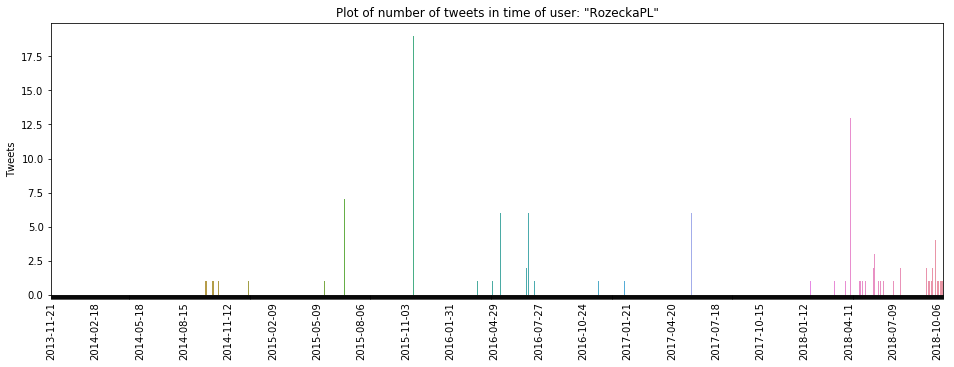

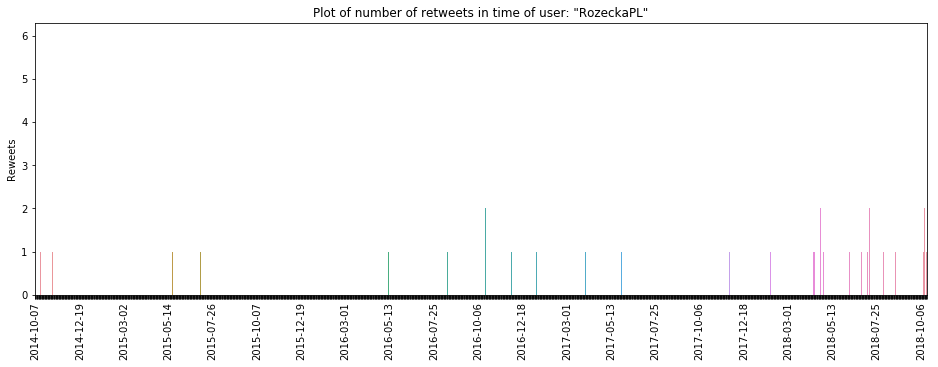

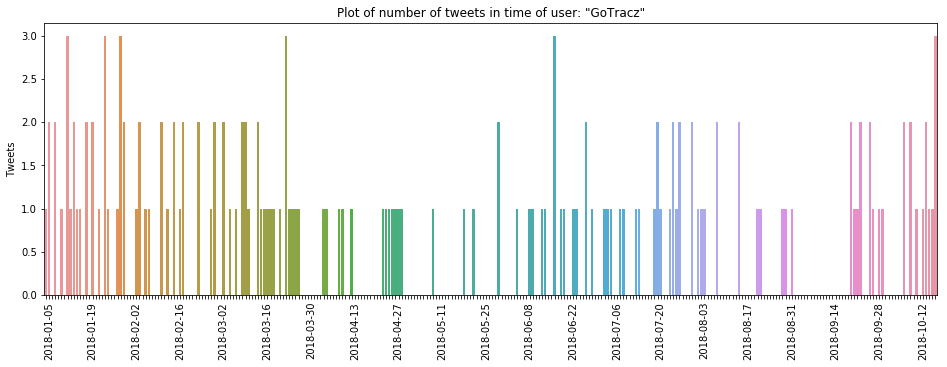

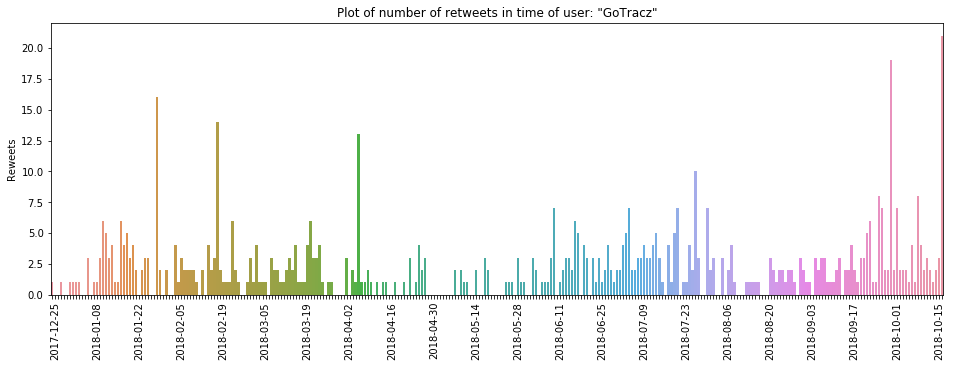

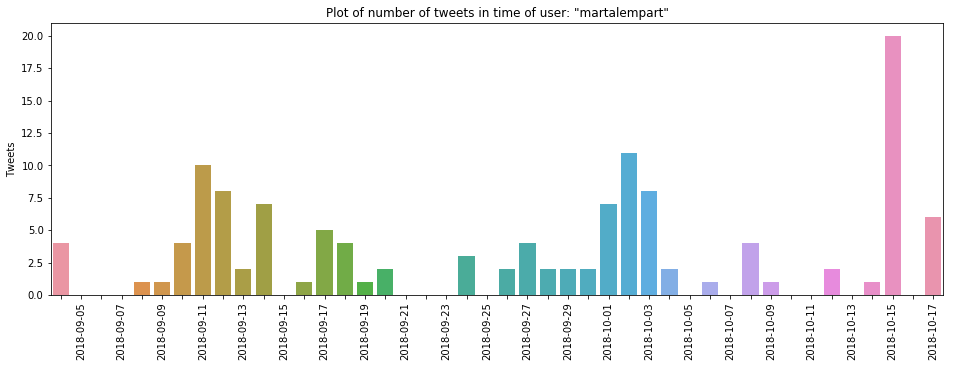

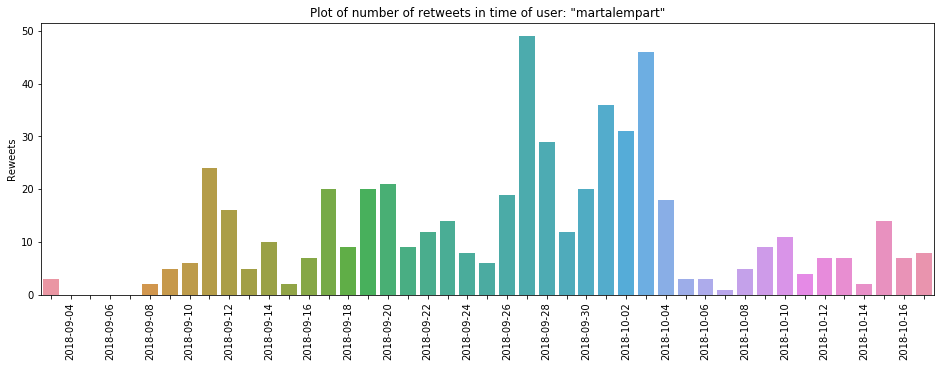

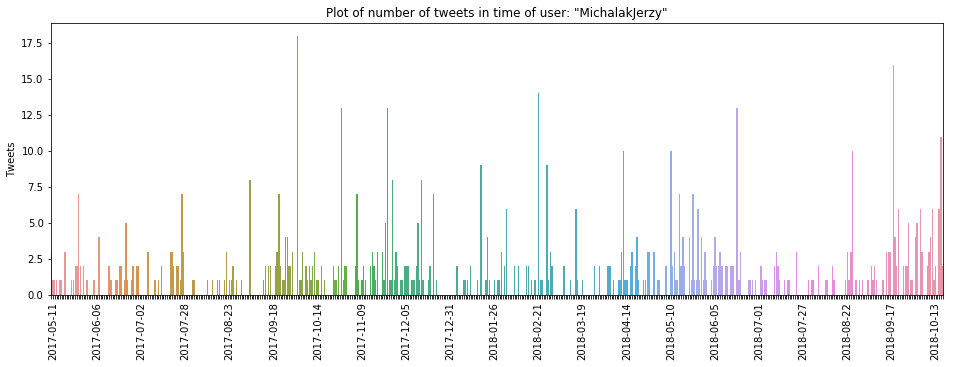

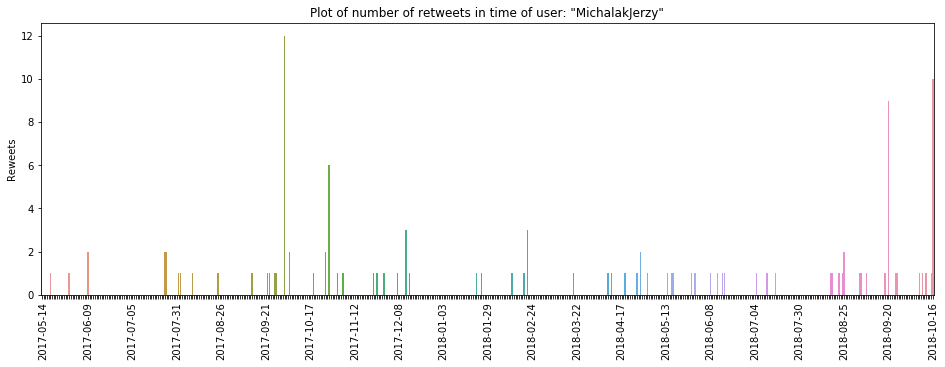

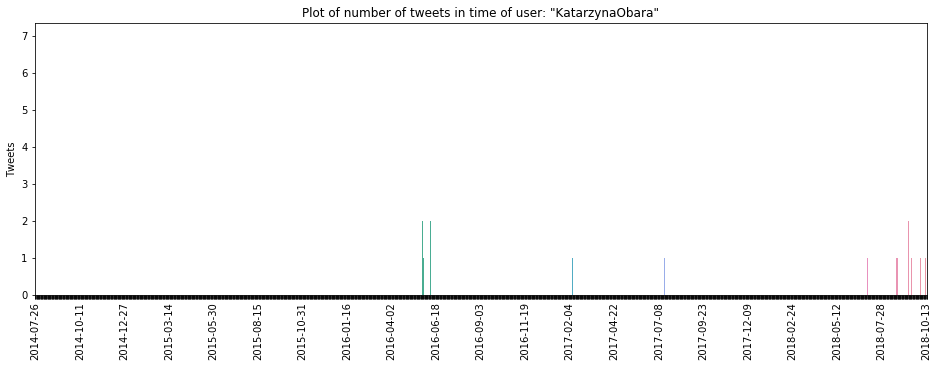

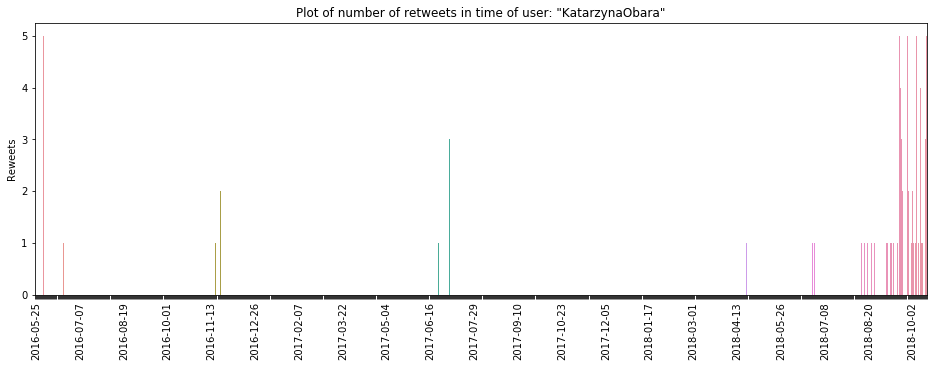

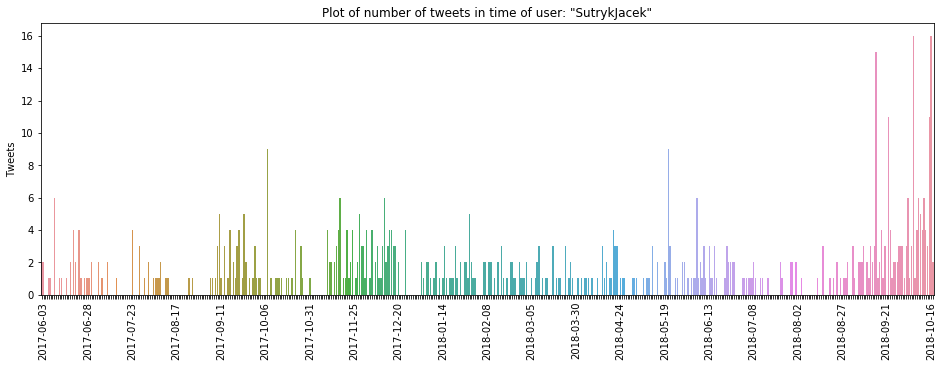

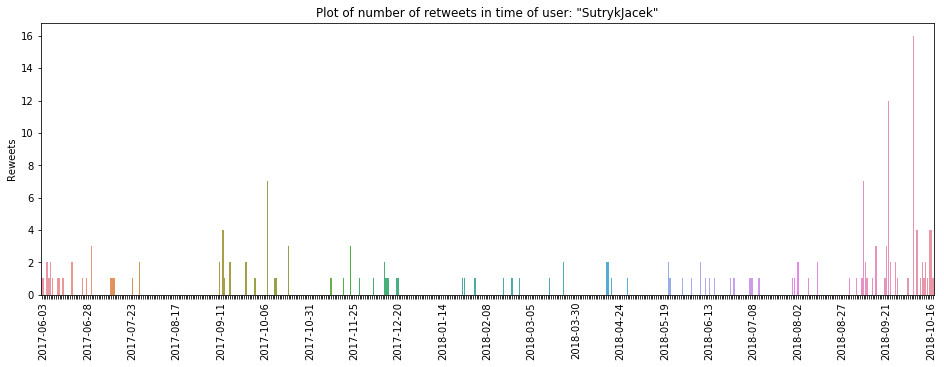

In [18]:
def get_number_of_tweets_in_time(tweets, username, since_date):
    user_tweets = tweets.loc[tweets['user_rt'] == username]
    user_tweets = user_tweets[user_tweets['date'] >= user_tweets['date'].min()]
    
    
    max_date = datetime.datetime.strptime(user_tweets['date'].max(), "%Y-%m-%d").date()
    min_date = datetime.datetime.strptime(user_tweets['date'].min(), "%Y-%m-%d").date()
    numdays = (max_date - min_date).days
    date_list = [max_date - datetime.timedelta(days=x) for x in range(0, numdays)]
    
    user_tweets = user_tweets.groupby(['date'])['tweet'].count()
    dates = []
    values = []
    
    for i, v in user_tweets.items():
        dates.append(datetime.datetime.strptime(i, "%Y-%m-%d").date())
        values.append(v)
    
    date_dict = {date: 0 for date in date_list}
    for date, value in zip(dates, values):
        date_dict[date] = value
    od = collections.OrderedDict(sorted(date_dict.items()))
    dates = []
    values = []
    
    for k, v in od.items(): 
        dates.append(k)
        values.append(v)
    
    return dates, values, numdays

for user in users:
    dates, values, numdays = get_number_of_tweets_in_time(tweets, user, None)
    ax = sns.barplot(dates, values)
    ax.set_ylabel('Tweets')
    ax.set_title("Plot of number of tweets in time of user: \"{}\"".format(user))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    for ind, label in enumerate(ax.get_xticklabels()):
        if ind % (numdays // 20) == 0:
            label.set_visible(True)
        else:
            label.set_visible(False)
    plt.show()
    
    dates, values, numdays = get_number_of_tweets_in_time(retweets, user, None)
    ax = sns.barplot(dates, values)
    ax.set_ylabel('Reweets')
    ax.set_title("Plot of number of retweets in time of user: \"{}\"".format(user))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    for ind, label in enumerate(ax.get_xticklabels()):
        if ind % (numdays // 20) == 0:
            label.set_visible(True)
        else:
            label.set_visible(False)
    plt.show()
    


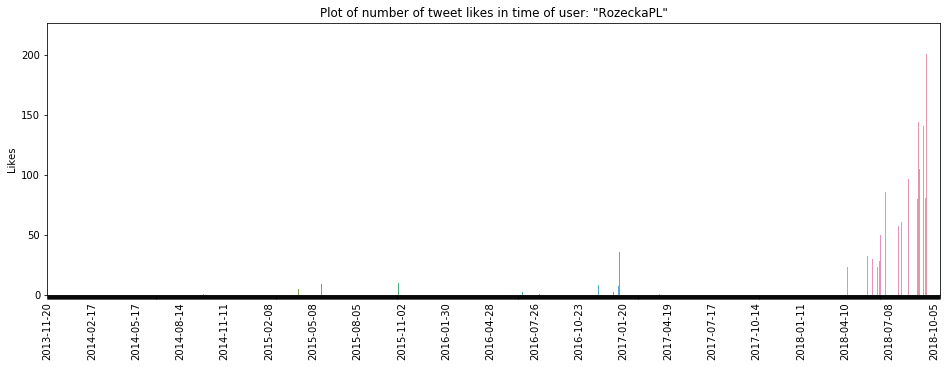

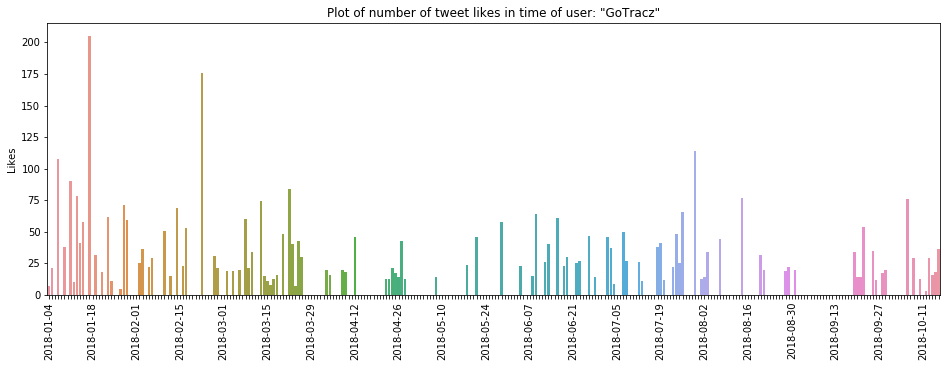

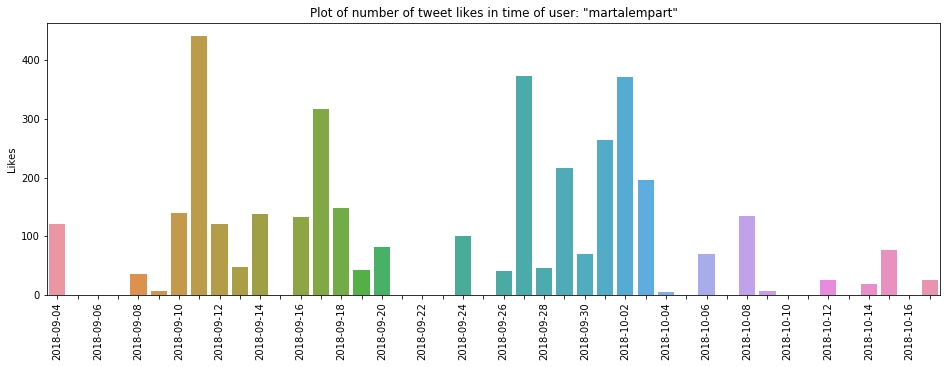

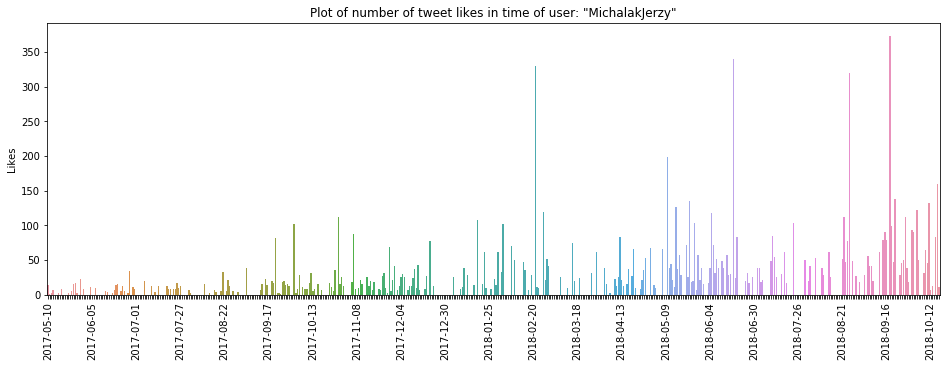

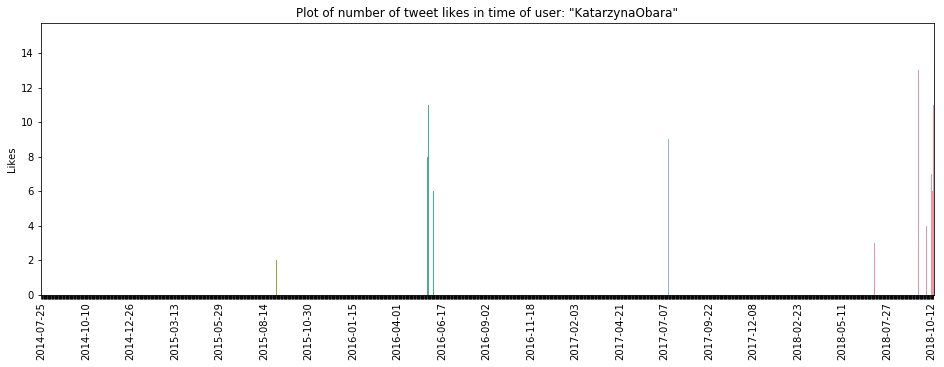

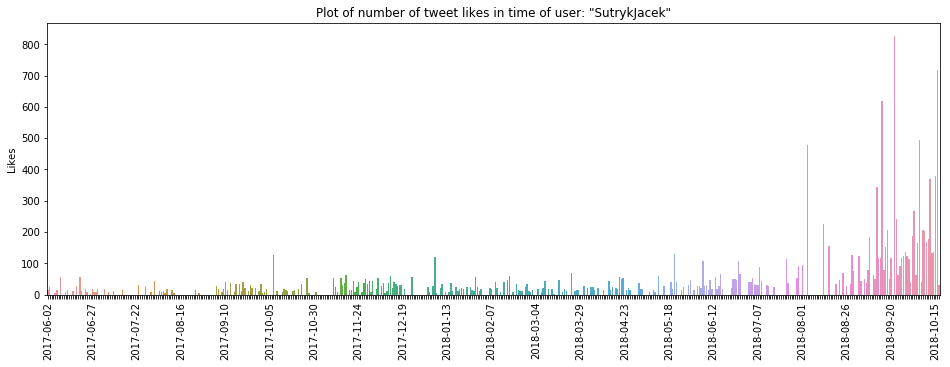

In [29]:
def get_number_of_likes_in_time(tweets, username, since_date):
    user_tweets = tweets.loc[tweets['username'] == username]
    user_tweets = user_tweets[user_tweets['date'] >= user_tweets['date'].min()]
    
    max_date = datetime.datetime.strptime(user_tweets['date'].max(), "%Y-%m-%d").date()
    min_date = datetime.datetime.strptime(user_tweets['date'].min(), "%Y-%m-%d").date()
    numdays = (max_date - min_date).days
    date_list = [max_date - datetime.timedelta(days=x) for x in range(0, numdays)]
    
    user_tweets = user_tweets.groupby(['date'])['likes'].sum()
    dates = []
    values = []
    
    for i, v in user_tweets.items():
        dates.append(datetime.datetime.strptime(i, "%Y-%m-%d").date())
        values.append(v)
    
    date_dict = {date: 0 for date in date_list}
    for date, value in zip(dates, values):
        date_dict[date] = value
    od = collections.OrderedDict(sorted(date_dict.items()))
    dates = []
    values = []
    
    for k, v in od.items(): 
        dates.append(k)
        values.append(v)
    
    return dates, values, numdays


def get_number_of_retweets_in_time(tweets, username, since_date):
    user_tweets = tweets.loc[tweets['user_rt'] == username]
    user_tweets = user_tweets[user_tweets['date'] >= user_tweets['date'].min()]
    max_date = datetime.datetime.strptime(user_tweets['date'].max(), "%Y-%m-%d").date()
    min_date = datetime.datetime.strptime(user_tweets['date'].min(), "%Y-%m-%d").date()
    numdays = (max_date - min_date).days
    date_list = [max_date - datetime.timedelta(days=x) for x in range(0, numdays)]
    
    user_tweets = user_tweets.groupby(['date'])['likes'].sum()
    dates = []
    values = []
    
    for i, v in user_tweets.items():
        dates.append(datetime.datetime.strptime(i, "%Y-%m-%d").date())
        values.append(v)
    
    date_dict = {date: 0 for date in date_list}
    for date, value in zip(dates, values):
        date_dict[date] = value
    od = collections.OrderedDict(sorted(date_dict.items()))
    dates = []
    values = []
    
    for k, v in od.items(): 
        dates.append(k)
        values.append(v)
    
    return dates, values, numdays


for user in users:
    dates, values, numdays = get_number_of_likes_in_time(tweets, user, None)
    
    ax = sns.barplot(dates, values)
    ax.set_ylabel('Likes')
    ax.set_title("Plot of number of tweet likes in time of user: \"{}\"".format(user))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    for ind, label in enumerate(ax.get_xticklabels()):
        if ind % (numdays // 20) == 0:
            label.set_visible(True)
        else:
            label.set_visible(False)
    plt.show()
    
    
#     dates, values, numdays = get_number_of_retweets_in_time(retweets, user, None)
    
#     ax = sns.barplot(dates, values)
#     ax.set_ylabel('Likes')
#     ax.set_title("Plot of number of tweet retweets in time of user: \"{}\"".format(user))
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#     for ind, label in enumerate(ax.get_xticklabels()):
#         if ind % (numdays // 20) == 0:
#             label.set_visible(True)
#         else:
#             label.set_visible(False)
#     plt.show()


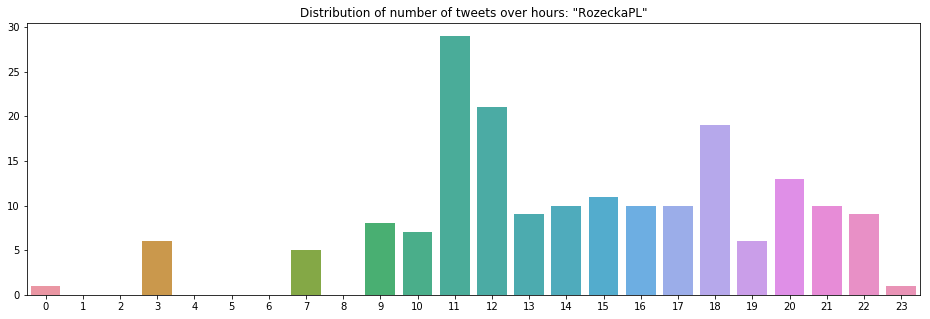

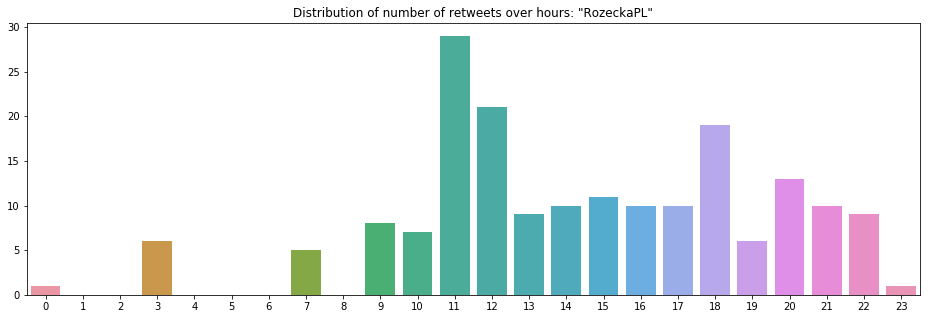

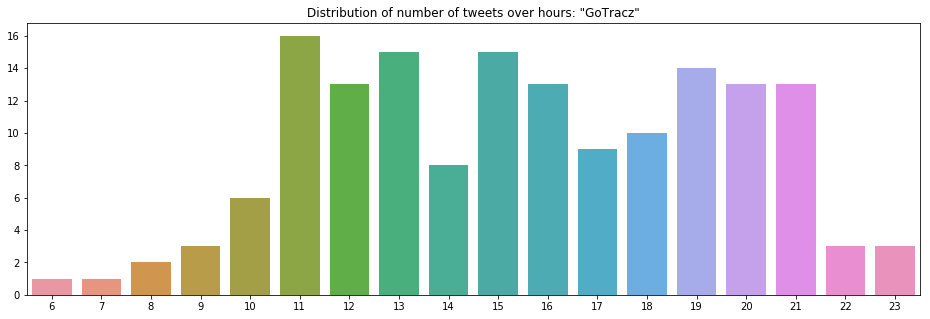

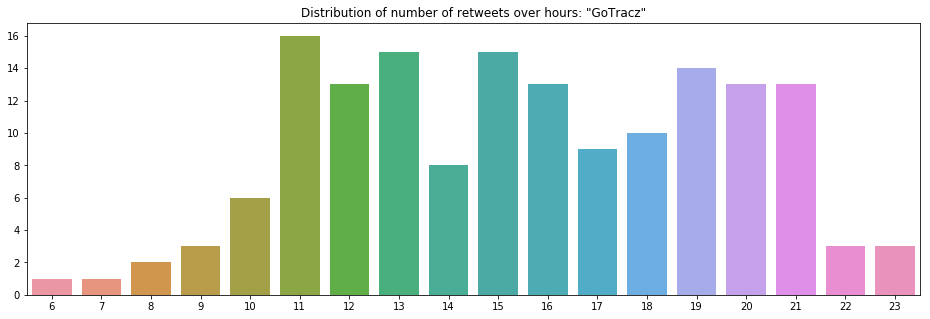

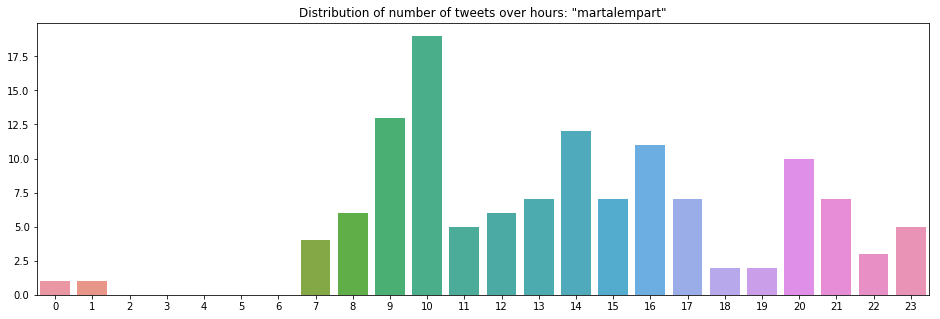

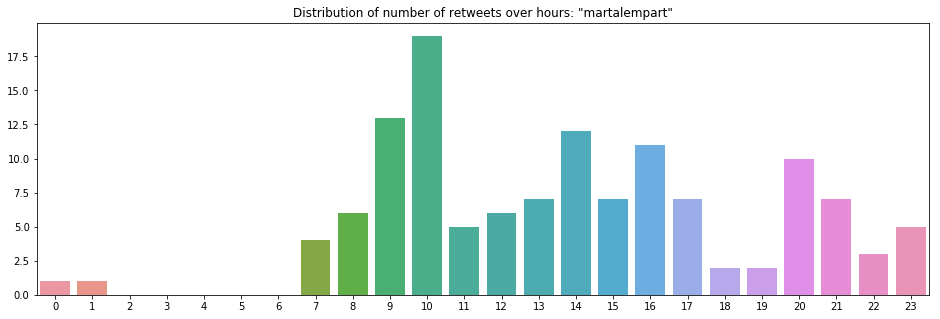

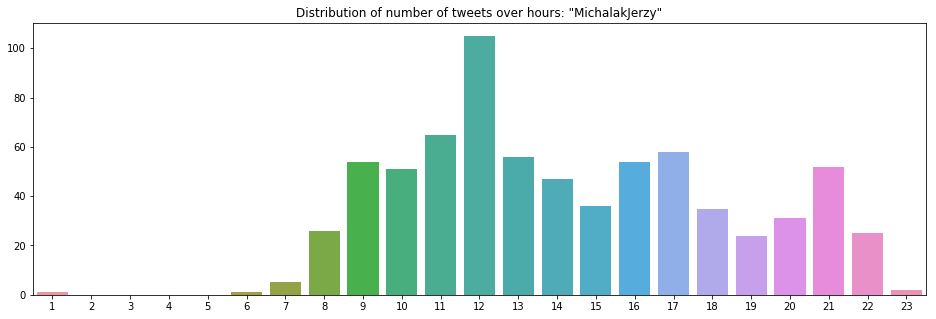

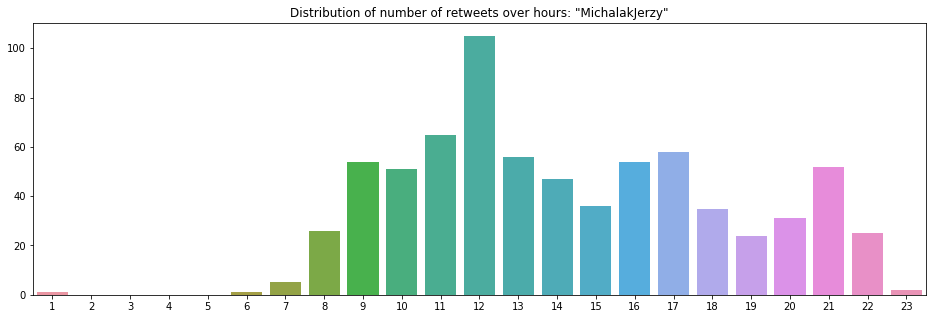

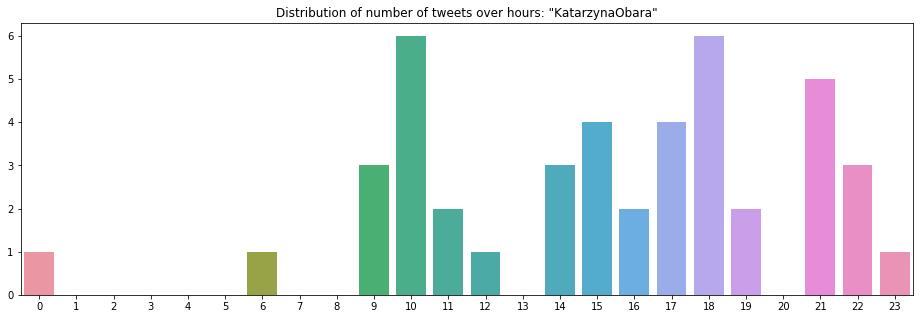

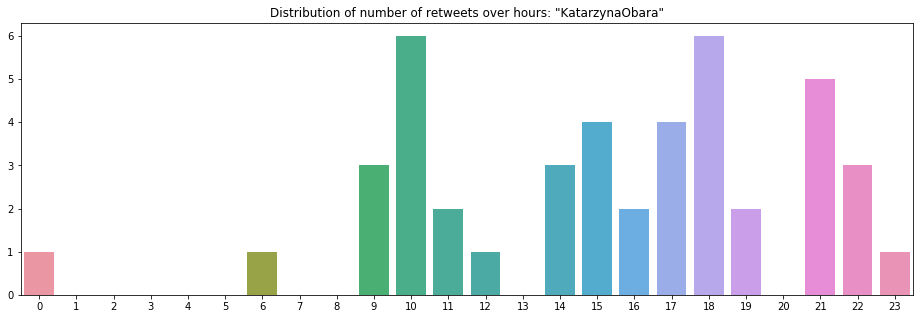

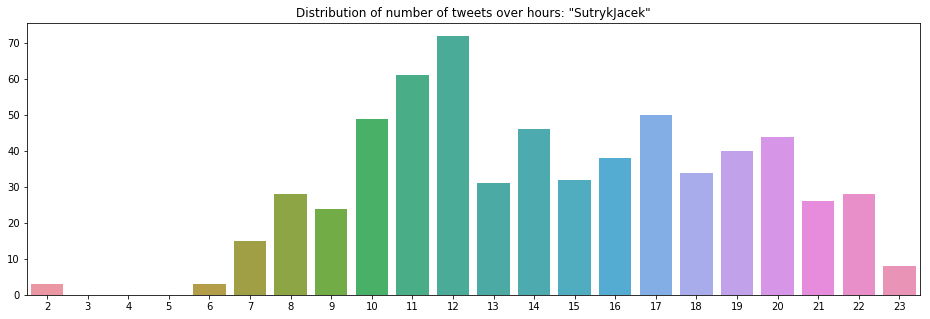

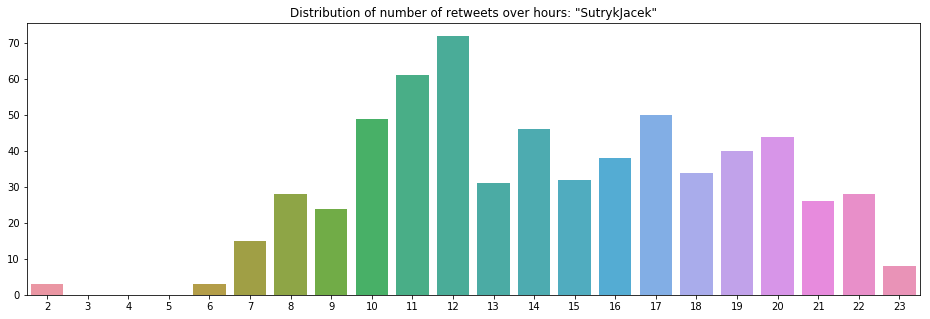

In [6]:
for user in users:
    user_tweets = tweets.loc[tweets['username'] == user]
    user_tweets = user_tweets[user_tweets['date'] >= user_tweets['date'].min()]
    user_tweets['time'] = pd.to_datetime(user_tweets['time'])
    user_tweets.index = user_tweets['time']
    user_tweets = user_tweets.resample('H').count()
    
    ax = sns.barplot(user_tweets.index.hour.tolist(), user_tweets['tweet'].tolist())
    ax.set_title("Distribution of number of tweets over hours: \"{}\"".format(user))
    plt.show()
    
    user_tweets = tweets.loc[tweets['user_rt'] == user]
    user_tweets = user_tweets[user_tweets['date'] >= user_tweets['date'].min()]
    user_tweets['time'] = pd.to_datetime(user_tweets['time'])
    user_tweets.index = user_tweets['time']
    user_tweets = user_tweets.resample('H').count()
    
    ax = sns.barplot(user_tweets.index.hour.tolist(), user_tweets['tweet'].tolist())
    ax.set_title("Distribution of number of retweets over hours: \"{}\"".format(user))
    plt.show()
    

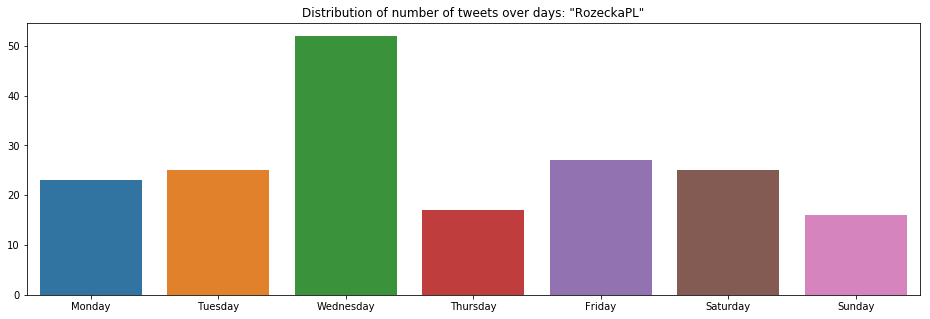

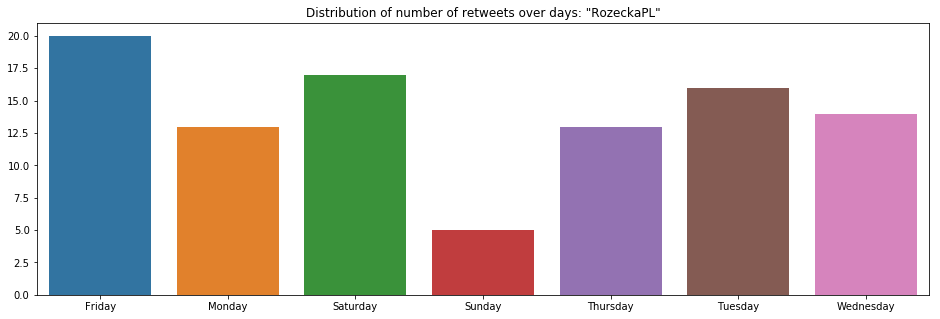

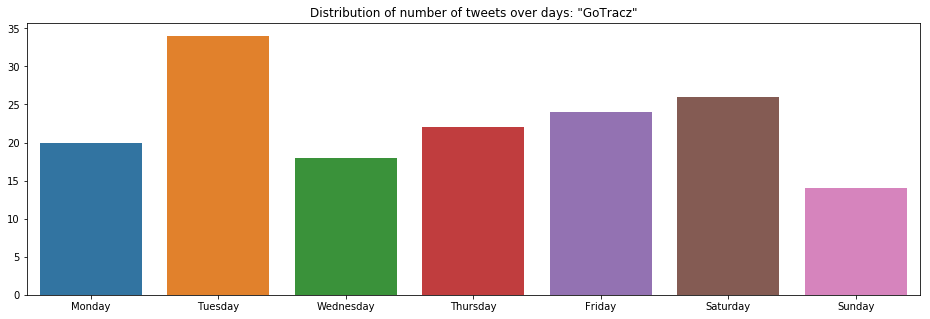

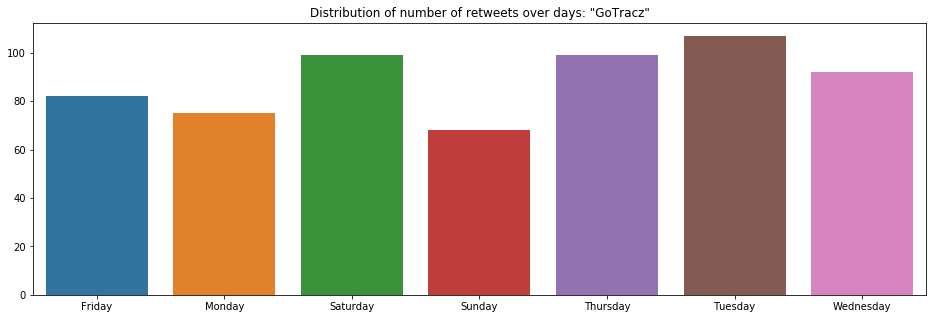

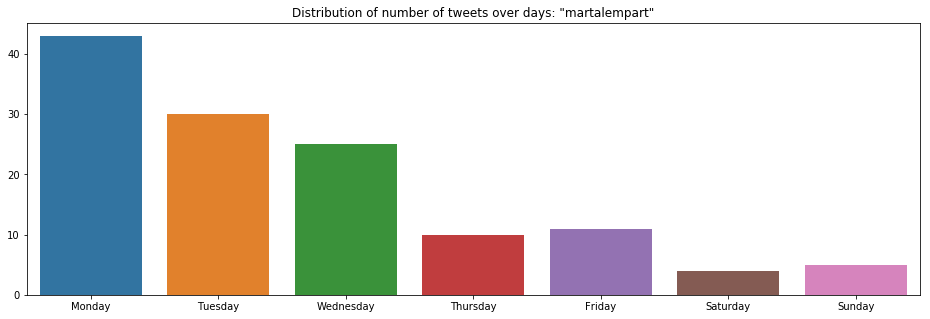

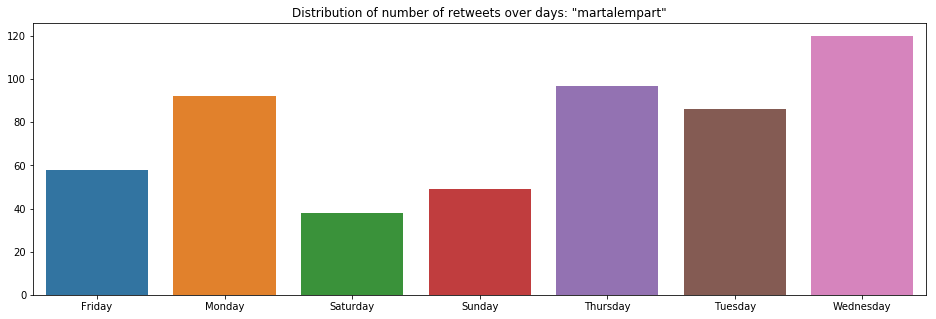

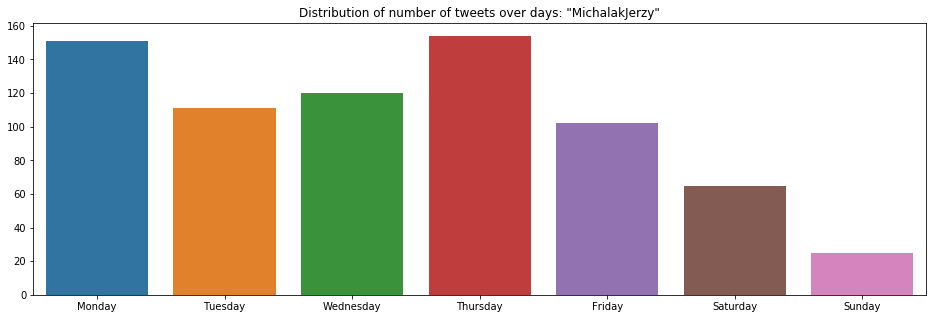

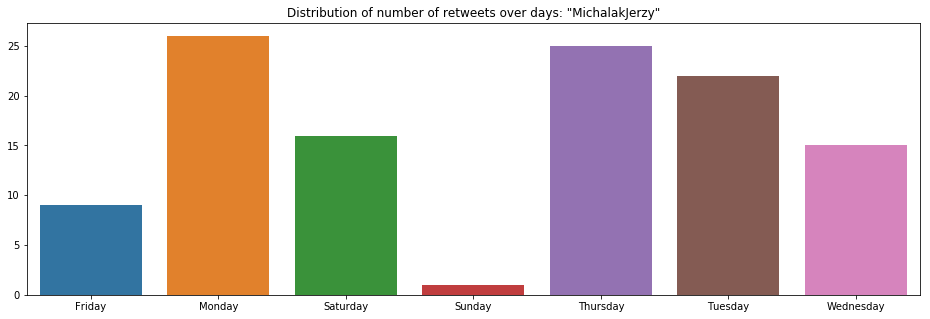

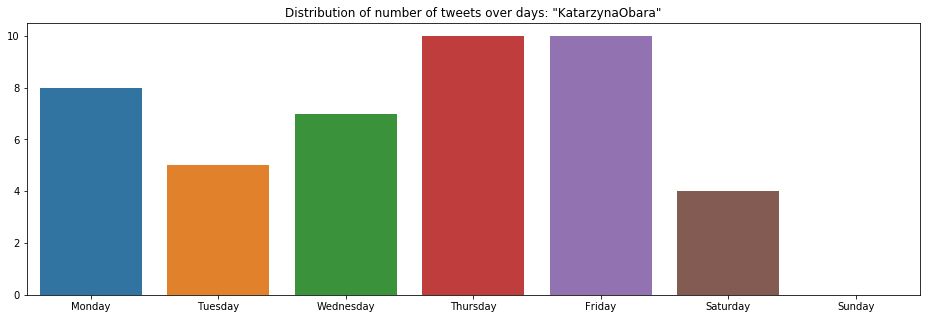

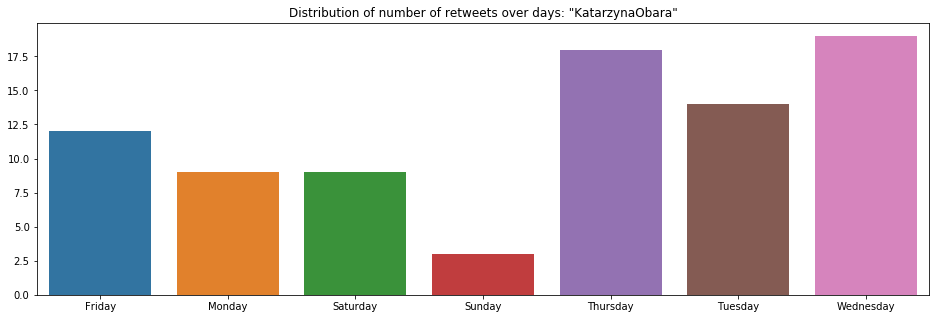

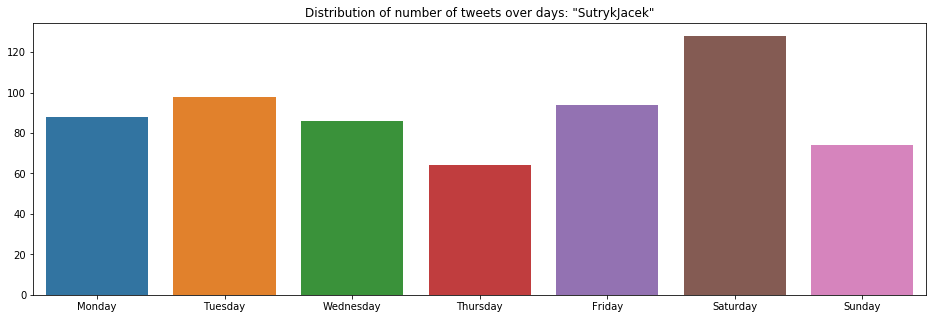

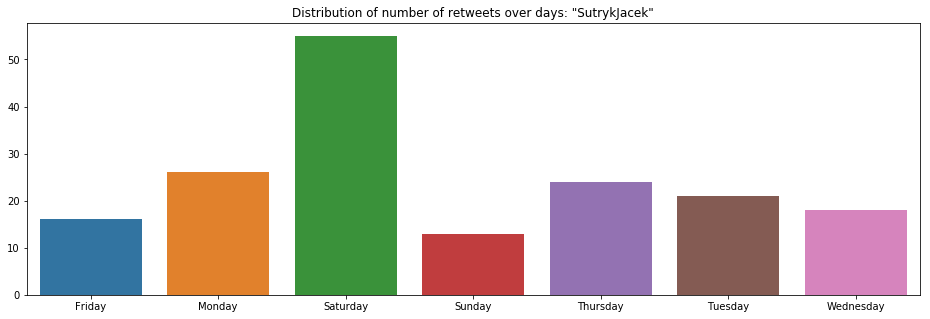

In [7]:
for user in users:
    user_tweets = tweets.loc[tweets['username'] == user]
    user_tweets = user_tweets[user_tweets['date'] >= user_tweets['date'].min()]
    user_tweets['date'] = pd.to_datetime(user_tweets['date'])
    user_tweets['date'] = user_tweets['date'].dt.weekday_name
    user_tweets = user_tweets.groupby(['date'])['tweet'].count()
    user_tweets = user_tweets.sort_index()
    
    user_tweets = user_tweets.reindex(index = ['Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    sns.barplot(user_tweets.index.tolist(), user_tweets.values.tolist()).set_title("Distribution of number of tweets over days: \"{}\"".format(user))
    plt.show()
    
    user_tweets = retweets.loc[retweets['user_rt'] == user]
    user_tweets = user_tweets[user_tweets['date'] >= user_tweets['date'].min()]
    user_tweets['date'] = pd.to_datetime(user_tweets['date'])
    user_tweets['date'] = user_tweets['date'].dt.weekday_name
    user_tweets = user_tweets.groupby(['date'])['tweet'].count()
    user_tweets = user_tweets.sort_index()
    
    sns.barplot(user_tweets.index.tolist(), user_tweets.values.tolist()).set_title("Distribution of number of retweets over days: \"{}\"".format(user))
    plt.show()
    

In [39]:
from polyglot.downloader import downloader
downloader.download("sentiment2.pl")

[polyglot_data] Downloading package sentiment2.pl to
[polyglot_data]     /home/piotr/polyglot_data...


True

In [7]:
from polyglot.text import Text

blob = "Agnieszka już dawno tutaj nie mieszka i bardzo lubi słodkie kotki zło."
text = Text(blob)
for w in text.words:
    print("{:<16}{:>2}".format(w, w.polarity))

Agnieszka        0
już              0
dawno            0
tutaj            0
nie              0
mieszka          0
i                0
bardzo           1
lubi             1
słodkie          0
kotki            0
zło             -1
.                0


[-0.04708222811671088, 0.0, 0.01694915254237288, 0.005058732269503546, 0.001662700922662972, 0.0035818084025435654, 0.0, 0.0, 0.0, -0.0044494773519163765, -0.0078125, 0.0, 0.0, 0.011641791044776119, -0.023076923076923078, -0.003364325911426474, -0.016129032258064516, 0.029166666666666667, -0.010869565217391304, -0.003308008469298792, 0.01982436867750827, 0.0019429205851619648, 0.0, 0.0, -0.005869565217391304, -0.02857142857142857, 0.0, 0.027777777777777776, -0.0012463768115942029, 0.010584677419354838]


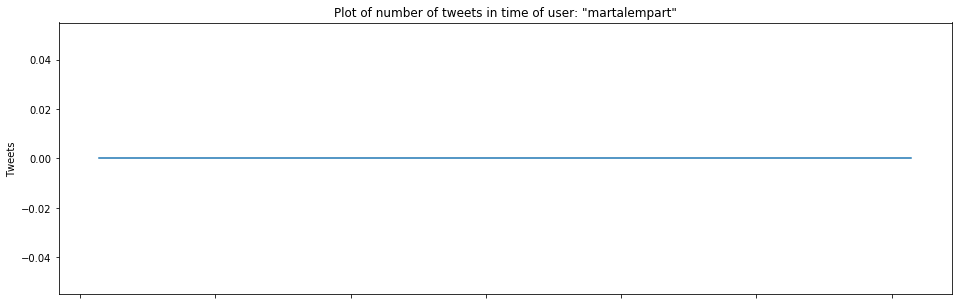

In [11]:
def get_sentiment_of_tweets_in_time(tweets, username, since_date):
    user_tweets = tweets.loc[tweets['user_rt'] == username]
    user_tweets = user_tweets[user_tweets['date'] >= user_tweets['date'].min()]
    
    
    max_date = datetime.datetime.strptime(user_tweets['date'].max(), "%Y-%m-%d").date()
    min_date = datetime.datetime.strptime(user_tweets['date'].min(), "%Y-%m-%d").date()
    numdays = (max_date - min_date).days
    date_list = [max_date - datetime.timedelta(days=x) for x in range(0, numdays)]
    user_tweets = user_tweets.groupby(['date'])['tweet']
    
    dates = []
    values = []
    
    for key, item in user_tweets:
        sentiments = []
        for k in user_tweets.get_group(key):
            text = Text(k)
            text.language = "pl"
            sentiments.append(np.mean([w.polarity for w in text.words]))
        values.append(np.mean(sentiments))

    print(values)
#     for i, v in user_tweets.items():
#         dates.append(datetime.datetime.strptime(i, "%Y-%m-%d").date())
#         values.append(v)
    
    date_dict = {date: 0 for date in date_list}
    for date, value in zip(dates, values):
        date_dict[date] = value
    od = collections.OrderedDict(sorted(date_dict.items()))
    dates = []
    values = []
    
    for k, v in od.items(): 
        dates.append(k)
        values.append(v)
    
    return dates, values, numdays

for user in users[2:3]:
    dates, values, numdays = get_sentiment_of_tweets_in_time(tweets, user, None)
    ax = sns.lineplot(dates, values)
    ax.set_ylabel('Tweets')
    ax.set_title("Plot of number of tweets in time of user: \"{}\"".format(user))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    for ind, label in enumerate(ax.get_xticklabels()):
        if ind % (numdays // 20) == 0:
            label.set_visible(True)
        else:
            label.set_visible(False)
    plt.show()

In [56]:
user_tweets = tweets.loc[tweets['user_rt'] == 'martalempart']

In [67]:
grouped_df = user_tweets.groupby(['date'])['tweet']
for key, item in grouped_df:
    sentiments = []
    for k in grouped_df.get_group(key):
        text = Text(k)
        text.language = "pl"
        sentiments.append(np.mean([w.polarity for w in text.words]))
    print(np.mean(sentiments))

-0.04708222811671088
0.0
0.01694915254237288
0.005058732269503546
0.001662700922662972
0.0035818084025435654
0.0
0.0
0.0
-0.0044494773519163765
-0.0078125
0.0
0.0
0.011641791044776119
-0.023076923076923078
-0.003364325911426474
-0.016129032258064516
0.029166666666666667
-0.010869565217391304
-0.003308008469298792
0.01982436867750827
0.0019429205851619648
0.0
0.0
-0.005869565217391304
-0.02857142857142857
0.0
0.027777777777777776
-0.0012463768115942029
0.010584677419354838


NameError: name 'grouped_df' is not defined